# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata,on="Mouse ID")

# Display the data table for preview
study_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [136]:
# Checking the number of mice.
n_mice = len(study_data_complete["Mouse ID"].unique())
n_mice

249

In [137]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [138]:
# Optional: Get all the data for the duplicate mouse ID. 
ID = "g989"
display(study_data_complete.loc[study_data_complete["Mouse ID"]==ID,:])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_reduced=study_data_complete.drop_duplicates()
study_data_reduced.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [140]:
# Checking the number of mice in the clean DataFrame. the number stays the same because the unique number hasn't decreased
len(study_data_reduced["Mouse ID"].unique())

249

## Summary Statistics

In [141]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_df = study_data_reduced.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df.count().head(5)
mean_tumor = drug_df["Tumor Volume (mm3)"].mean()
median_tumor = drug_df["Tumor Volume (mm3)"].median()
variance_tumor = drug_df["Tumor Volume (mm3)"].var()
std_tumor = drug_df["Tumor Volume (mm3)"].std()
error_tumor = drug_df["Tumor Volume (mm3)"].sem()
summary_drug = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                             "Tumor Volume Variance": variance_tumor, "Tumor Volume Std. Dev.": std_tumor,
                            "Tumor Volume Std. Err.": error_tumor})
# Assemble the resulting series into a single summary DataFrame.
summary_drug

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pd.DataFrame(drug_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem']))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

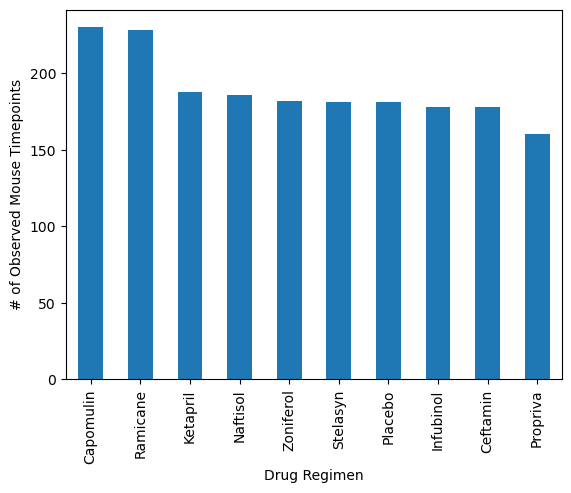

In [143]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = study_data_reduced["Drug Regimen"].value_counts().plot(ylabel = "# of Observed Mouse Timepoints", kind = "bar")


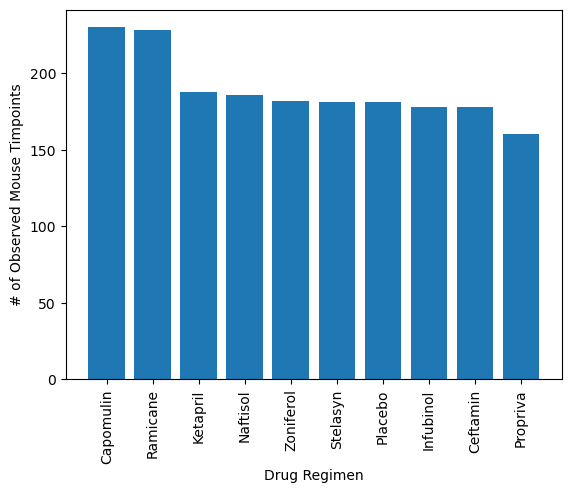

In [144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = study_data_reduced["Drug Regimen"].value_counts()
pyplot_bar = plt.bar(drug_counts.index.values,drug_counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.xticks(rotation='vertical');

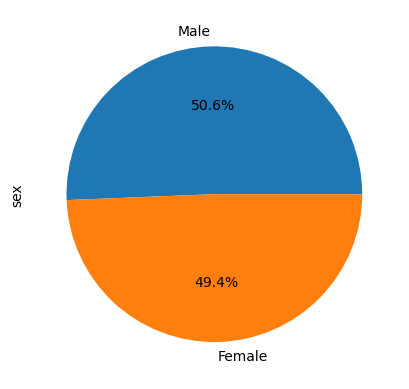

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = study_data_reduced["Sex"].value_counts().plot(ylabel="sex",kind = "pie", autopct='%1.1f%%')

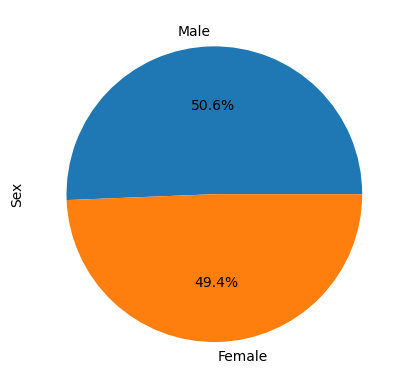

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = study_data_reduced["Sex"].value_counts()
pyplot_pie = plt.pie(sex_counts, labels = sex_counts.index.values, autopct= '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across fourof the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_reduced.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(study_data_reduced,last_timepoint, on =["Mouse ID","Timepoint"])
final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [148]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Create a list to store potential outliers for each drug
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Create a for loop to go through each drug
for x in drugs:
    #new df with the data that only has the drug "x"
    drug_data = final_tumor.loc[final_tumor["Drug Regimen"]==x]
    #append volume to the tumor_vol_data list 
    tumor_vol_data.append(drug_data["Tumor Volume (mm3)"])
    #Calculate the quartiles
    quartiles = drug_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #Go through each data point in the tumor volume column to see if it is an outlier
    for value in drug_data["Tumor Volume (mm3)"]:
        #If it's a low outlier add to outlier list
        if value<lower_bound:
            outliers.append(value) 
        #If it's a high outlier add to outlier list
        elif value>upper_bound:
            outliers.append(value) 
    print(f"Potential outliers for {x} are {outliers}")
    #Clear outlier list for next loop
    outliers = []

Potential outliers for Capomulin are []
Potential outliers for Ramicane are []
Potential outliers for Infubinol are [36.3213458]
Potential outliers for Ceftamin are []


C:\Users\ancol\AppData\Local\Temp\ipykernel_20948\3418991131.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(drugs)


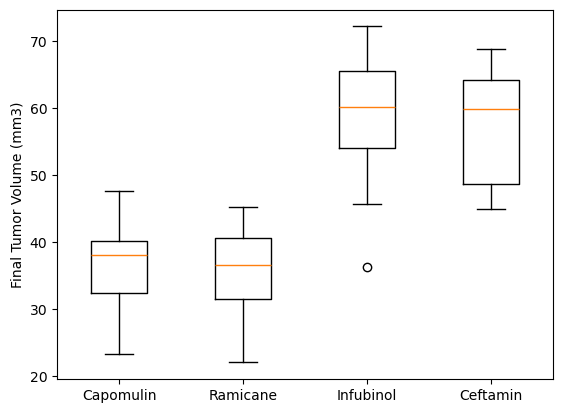

In [149]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(drugs)
#Can use tumor_vol_data that was calculated with previous loop
ax1.boxplot(tumor_vol_data);

## Line and Scatter Plots

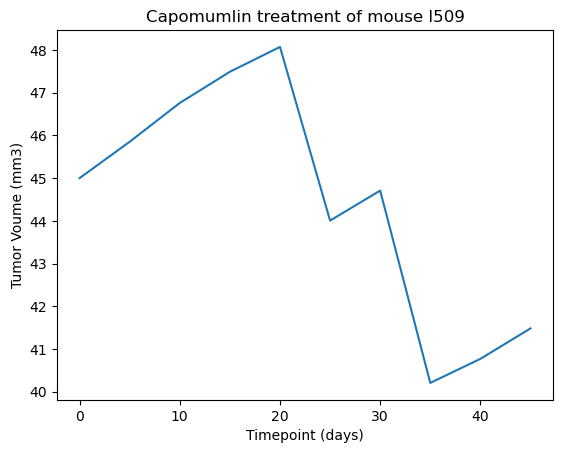

In [150]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ID = "l509"
#Create a new df with only data for that specific mouse
mouse_df = study_data_reduced.loc[study_data_reduced["Mouse ID"]==ID]
x_axis=mouse_df["Timepoint"] 
y_axis = mouse_df["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Voume (mm3)")
plt.title(f"Capomumlin treatment of mouse {ID}");


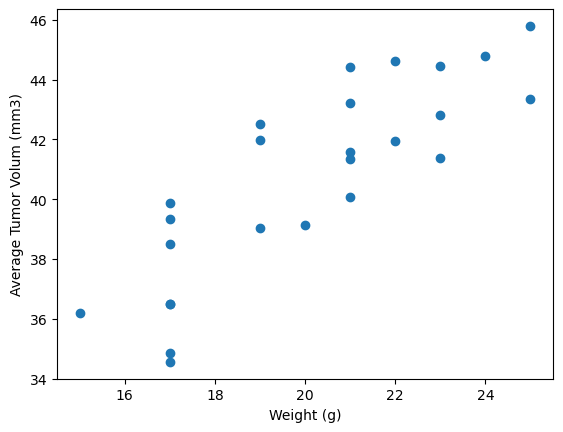

In [151]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Create a new df with just the capomulin drug
capomulin_df =study_data_reduced[study_data_reduced["Drug Regimen"]=="Capomulin"]
mouse_df = capomulin_df.groupby("Mouse ID")
y_axis = mouse_df["Tumor Volume (mm3)"].mean()
x_axis = mouse_df["Weight (g)"].mean()
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volum (mm3)")
plt.scatter(x_axis,y_axis);


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


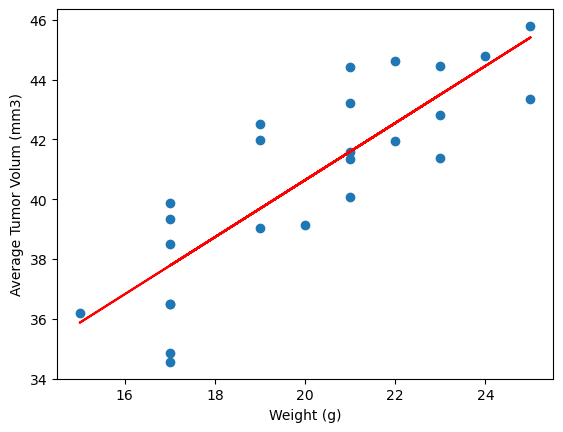

In [152]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Plot scatterplot again
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volum (mm3)")
#Calculate slope, intercept. etc. needed for line of best fit
slope,intercept,rvalue,pvalue,stderr= st.linregress(x_axis,y_axis)
#Create equation for line of best fit (y values in graph)
regress_values = x_axis *slope + intercept
plt.scatter(x_axis,y_axis);
plt.plot(x_axis,regress_values, color="red")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")